[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Portfolio Performance: [{'symbol': 'NKE', 'investment': 24.0, 'current_value': Ticker
NKE    312.0
Name: 2024-12-17 00:00:00, dtype: float64, 'return_percentage': Ticker
NKE    1200.0
Name: 2024-12-17 00:00:00, dtype: float64}, {'symbol': 'AAPL', 'investment': 1500.0, 'current_value': Ticker
AAPL    2534.799957
Name: 2024-12-17 00:00:00, dtype: float64, 'return_percentage': Ticker
AAPL    68.986664
Name: 2024-12-17 00:00:00, dtype: float64}]
Overall Portfolio Return: Ticker
NKE   NaN
Name: 2024-12-17 00:00:00, dtype: float64
^GSPC Benchmark Return: Ticker
^GSPC    31.688733
dtype: float64



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


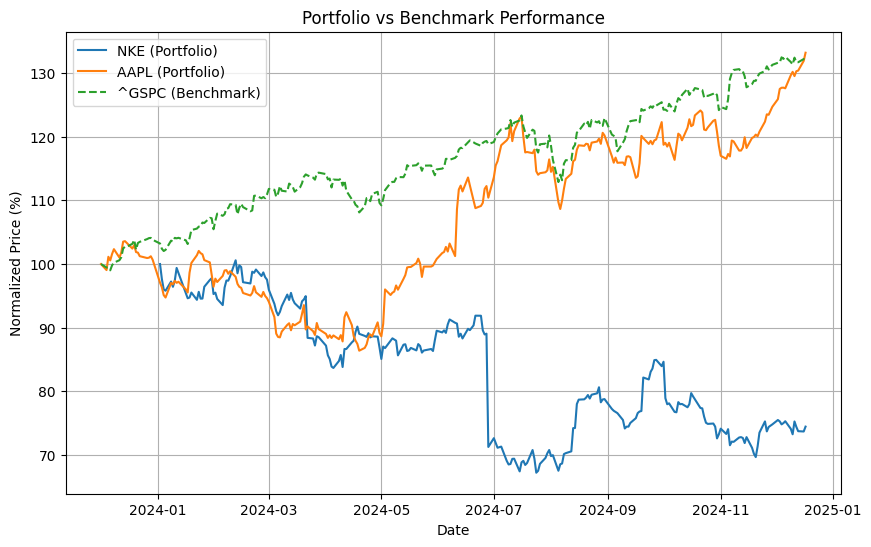

In [15]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

def fetch_data(symbol, start_date, end_date):
    """
    Fetch historical price data for a given symbol from Yahoo Finance.
    """
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Adj Close']

def calculate_portfolio_performance(portfolio):
    """
    Calculate the portfolio performance based on current prices.
    """
    portfolio_performance = []
    total_investment = 0
    portfolio_value = 0

    for stock in portfolio:
        symbol = stock['symbol']
        quantity = stock['quantity']
        buy_price = stock['buyPrice']
        buy_date = stock['buyDate']
        buy_date = datetime.datetime.strptime(buy_date, '%Y-%m-%d')
        end_date = datetime.datetime.now().strftime('%Y-%m-%d')

        # Fetch historical data
        prices = fetch_data(symbol, buy_date, end_date)
        current_price = prices.iloc[-1]

        # Calculate performance
        investment = buy_price * quantity
        current_value = current_price * quantity
        return_percentage = ((current_price - buy_price) / buy_price) * 100

        portfolio_performance.append({
            'symbol': symbol,
            'investment': investment,
            'current_value': current_value,
            'return_percentage': return_percentage
        })

        total_investment += investment
        portfolio_value += current_value

    overall_return = ((portfolio_value - total_investment) / total_investment) * 100

    return portfolio_performance, overall_return

def benchmark_performance(index, start_date, end_date):
    """
    Calculate benchmark performance over the same period.
    """
    index_data = fetch_data(index, start_date, end_date)
    start_price = index_data.iloc[0]
    end_price = index_data.iloc[-1]
    return ((end_price - start_price) / start_price) * 100

def plot_comparison(portfolio, index, start_date):
    """
    Visualize portfolio vs benchmark performance.
    """
    plt.figure(figsize=(10, 6))
    
    # Portfolio performance over time
    for stock in portfolio:
        prices = fetch_data(stock['symbol'], stock['buyDate'], datetime.datetime.now().strftime('%Y-%m-%d'))
        plt.plot(prices.index, prices / prices.iloc[0] * 100, label=f"{stock['symbol']} (Portfolio)")

    # Benchmark performance over time
    index_prices = fetch_data(index, start_date, datetime.datetime.now().strftime('%Y-%m-%d'))
    plt.plot(index_prices.index, index_prices / index_prices.iloc[0] * 100, label=f"{index} (Benchmark)", linestyle='--')

    plt.title("Portfolio vs Benchmark Performance")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price (%)")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
portfolio = [
    {'symbol': 'NKE', 'quantity': 4, 'buyPrice': 6.0, 'buyDate': '2024-01-01'},
    {'symbol': 'AAPL', 'quantity': 10, 'buyPrice': 150.0, 'buyDate': '2023-12-01'}
]
index = '^GSPC'  # S&P 500 Index
start_date = min(stock['buyDate'] for stock in portfolio)

# Calculate performances
portfolio_perf, overall_return = calculate_portfolio_performance(portfolio)
benchmark_perf = benchmark_performance(index, start_date, datetime.datetime.now().strftime('%Y-%m-%d'))

# Print results
print("Portfolio Performance:", portfolio_perf)
print("Overall Portfolio Return:", overall_return)
print(f"{index} Benchmark Return:", benchmark_perf)

# Plot comparison
plot_comparison(portfolio, index, start_date)


In [ ]:
def get_plot_data(portfolio, index, start_date):
    """
    Visualize portfolio vs benchmark performance.
    """
    #plt.figure(figsize=(10, 6))

    data_return = []
    
    # Portfolio performance over time
    for stock in portfolio:
        prices = fetch_data(stock['symbol'], stock['buyDate'], datetime.datetime.now().strftime('%Y-%m-%d'))
        prices = prices / prices.iloc[0] * 100
        data_return.append(prices)
        

    # Benchmark performance over time
    index_prices = fetch_data(index, start_date, datetime.datetime.now().strftime('%Y-%m-%d'))
    
    
    index_returns = index_prices / index_prices.iloc[0] * 100
    data_return.append(index_returns)
    print(data_return)

get_plot_data(portfolio, index, start_date)

    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[Ticker             NKE
Date                  
2024-01-02  100.000000
2024-01-03   97.644295
2024-01-04   96.011259
2024-01-05   95.804780
2024-01-08   97.250112
...                ...
2024-12-11   75.272236
2024-12-12   74.422619
2024-12-13   73.744836
2024-12-16   73.697102
2024-12-17   74.460805

[243 rows x 1 columns], Ticker            AAPL
Date                  
2023-12-01  100.000000
2023-12-04   99.053536
2023-12-05  101.139929
2023-12-06  100.564729
2023-12-07  101.584397
...                ...
2024-12-11  129.521839
2024-12-12  130.294273
2024-12-13  130.383602
2024-12-16  131.912698
2024-12-17  133.194834

[263 rows x 1 columns], Ticker           ^GSPC
Date                  
2023-12-01  100.000000
2023-12-04   99.459149
2023-12-05   99.402570
2023-12-06   99.014283
2023-12-07   99.803248
...                ...
2024-12-11  132.419588
2024-12-12  131.702665
2024-12-13  131.699179
2024-12-16  132.199551
2024-12-17  131.688733

[263 rows x 1 columns]]


In [14]:
def get_plot_data_new(portfolio, index, start_date):
 
    data_return = {"portfolio": {}, "benchmark": {}}
    
    # Portfolio performance over time
    for stock in portfolio:
        symbol = stock['symbol']
        buy_date = stock['buyDate']
        
        # Fetch stock prices
        prices = fetch_data(symbol, buy_date, datetime.datetime.now().strftime('%Y-%m-%d'))
        
        # Normalize prices to start at 100
        normalized_prices = prices / prices.iloc[0] * 100
        
        # Add to portfolio data
        data_return["portfolio"][symbol] = {
            "x": normalized_prices.index.tolist(),
            "y": normalized_prices.values.tolist()
        }

    # Benchmark performance over time
    index_prices = fetch_data(index, start_date, datetime.datetime.now().strftime('%Y-%m-%d'))
    
    # Normalize index prices to start at 100
    index_returns = index_prices / index_prices.iloc[0] * 100
    
    # Add to benchmark data
    data_return["benchmark"] = {
        "x": index_returns.index.tolist(),
        "y": index_returns.values.tolist()
    }

    return data_return

print(get_plot_data_new(portfolio, index, start_date))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

{'portfolio': {'NKE': {'x': [Timestamp('2024-01-02 00:00:00'), Timestamp('2024-01-03 00:00:00'), Timestamp('2024-01-04 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-08 00:00:00'), Timestamp('2024-01-09 00:00:00'), Timestamp('2024-01-10 00:00:00'), Timestamp('2024-01-11 00:00:00'), Timestamp('2024-01-12 00:00:00'), Timestamp('2024-01-16 00:00:00'), Timestamp('2024-01-17 00:00:00'), Timestamp('2024-01-18 00:00:00'), Timestamp('2024-01-19 00:00:00'), Timestamp('2024-01-22 00:00:00'), Timestamp('2024-01-23 00:00:00'), Timestamp('2024-01-24 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-01-26 00:00:00'), Timestamp('2024-01-29 00:00:00'), Timestamp('2024-01-30 00:00:00'), Timestamp('2024-01-31 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-06 00:00:00'), Timestamp('2024-02-07 00:00:00'), Timestamp('2024-02-08 00:00:00'), Timestamp('2024-02-09 00:00:00'), Timestamp('2024-02-